## Please enter below details:

**Full Name:** Sagar Mehta  <br>
**Panther ID:** 002649430

# Assignment 5


# iCollege Submission and Grading
After you have completed and thoroughly tested your code, submit the notebook to iCollege in order to receive credit for the assignment.

**Deadline: November 16, 2021, 11:59pm**

The assignment will be graded according to the following guidelines. <br>
1. A score between 0 and 100 will be assigned. <br>
2. If the notebook is not submitted before the specified deadline, or if the code does not work, then a grade of 0 will be assigned. <br>

### From the final dataframe you have created in Assignment 4 with the target variable, export it as a csv file, and then import the csv file in this notebook

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Assignment-4_labelled_final.csv')
df

,Unnamed: 0,SessionID,TimeStamp,ItemID,Category,click_weekday,TimeStampbuy,Price,Quantity,date,...,click_weekday_feature2,ave_item_price,Total_Price,date_feature5,time_feature5,dayofpurchase_feature6,sum,timeofday_feature8,timeofday_feature9,Session_on_time_of_day
0,0,9293568,2014-09-01 18:07:00.855000+00:00,214853225,S,0.0,0,0.0,0.0,0,...,0.0,653.500000,NaN,NaN,NaN,NaN,1307.0,NaN,NaN,NaN
1,1,9293653,2014-09-01 10:38:47.087000+00:00,214834871,S,0.0,0,0.0,0.0,0,...,0.0,5706.000000,NaN,NaN,NaN,NaN,34236.0,NaN,NaN,NaN
2,6,9293662,2014-09-01 06:51:35.382000+00:00,214677615,S,0.0,2014-09-01 07:11:38.046000+00:00,1151.0,1.0,2014-09-01,...,0.0,1151.000000,1151.0,2014-09-01,07:11:38.046000,Monday,2302.0,Morning,Morning,1.0
3,8,9293704,2014-09-01 18:29:59.130000+00:00,214846258,S,0.0,2014-09-01 18:38:10.349000+00:00,941.0,1.0,2014-09-01,...,0.0,941.000000,941.0,2014-09-01,18:38:10.349000,Monday,1882.0,Evening,Evening,2.0
4,24,9293797,2014-09-01 16:37:38.200000+00:00,214663310,S,0.0,0,0.0,0.0,0,...,0.0,2755.833333,1042.0,2014-09-01,16:57:57.697000,Monday,16535.0,Evening,Evening,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10471166,11299803,2014-09-24 18:42:46.025000+00:00,214848995,S,2.0,0,0.0,0.0,0,...,2.0,1884.000000,NaN,NaN,NaN,NaN,1884.0,NaN,NaN,NaN
99996,10471167,11299794,2014-09-24 19:09:33.233000+00:00,214861498,1,2.0,2014-09-24 19:25:36.882000+00:00,3664.0,1.0,2014-09-24,...,2.0,1360.300000,3664.0,2014-09-24,19:25:36.882000,Wednesday,13603.0,Night,Night,2.0
99997,10471211,11299793,2014-09-25 07:07:57.252000+00:00,214851757,S,3.0,0,0.0,0.0,0,...,3.0,1465.000000,1570.0,2014-09-25,07:18:35.017000,Thursday,4395.0,Morning,Morning,2.0
99998,10471223,9413607,0,214850949,0,0.0,2014-09-01 00:07:43.524000+00:00,1360.0,2.0,2014-09-01,...,NaN,NaN,2720.0,2014-09-01,00:07:43.524000,Monday,NaN,Morning,Morning,5.0


## Question 1 - Building Good Training Sets, Data Pre-Processing                         ------15 points

### Hints (and not limited to):
- You can handle missing data
- Dropping unnecessary columns.
- Dropping rows with null values.
- Handling categorical variables 
- Bringing features onto the same scale

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100000 non-null  int64  
 1   SessionID               100000 non-null  int64  
 2   TimeStamp               100000 non-null  object 
 3   ItemID                  100000 non-null  int64  
 4   Category                100000 non-null  object 
 5   click_weekday           100000 non-null  float64
 6   TimeStampbuy            100000 non-null  object 
 7   Price                   100000 non-null  float64
 8   Quantity                100000 non-null  float64
 9   date                    100000 non-null  object 
 10  time                    100000 non-null  object 
 11  dayofpurchase           100000 non-null  object 
 12  timeofday               100000 non-null  object 
 13  label                   100000 non-null  int64  
 14  item_cnt_in_ses      

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,5.451557e+06,3.110277e+06,0.0,2821199.5,5598413.5,8.332882e+06,10471348.0
SessionID,100000.0,1.059994e+07,5.802539e+05,9194351.0,10131545.5,10636294.0,1.108913e+07,11562107.0
ItemID,100000.0,2.147835e+08,1.082414e+05,214507331.0,214709595.0,214852230.0,2.148542e+08,214986133.0
click_weekday,100000.0,3.115400e+00,2.257940e+00,0.0,1.0,3.0,5.000000e+00,6.0
Price,100000.0,1.548566e+03,5.399211e+03,0.0,0.0,0.0,1.046000e+03,208288.0
Quantity,100000.0,4.991900e-01,1.079885e+00,0.0,0.0,0.0,1.000000e+00,30.0
label,100000.0,3.593000e-01,4.797977e-01,0.0,0.0,0.0,1.000000e+00,1.0
item_cnt_in_ses,99998.0,5.043911e+00,5.941446e+00,1.0,2.0,3.0,6.000000e+00,197.0
click_weekday_feature2,99998.0,3.115462e+00,2.257920e+00,0.0,1.0,3.0,5.000000e+00,6.0
ave_item_price,96580.0,5.174639e+03,1.080105e+04,26.0,993.5,1622.0,4.618222e+03,208288.0


In [5]:
df.columns

Index(['Unnamed: 0', 'SessionID', 'TimeStamp', 'ItemID', 'Category',
       'click_weekday', 'TimeStampbuy', 'Price', 'Quantity', 'date', 'time',
       'dayofpurchase', 'timeofday', 'label', 'item_cnt_in_ses',
       'click_weekday_feature2', 'ave_item_price', 'Total_Price',
       'date_feature5', 'time_feature5', 'dayofpurchase_feature6', 'sum',
       'timeofday_feature8', 'timeofday_feature9', 'Session_on_time_of_day'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0','SessionID','TimeStamp',
         'ItemID','TimeStampbuy','date','time',
        'timeofday_feature9','date_feature5', 'time_feature5',
         'dayofpurchase_feature6','Category','timeofday_feature8','ave_item_price'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   click_weekday           100000 non-null  float64
 1   Price                   100000 non-null  float64
 2   Quantity                100000 non-null  float64
 3   dayofpurchase           100000 non-null  object 
 4   timeofday               100000 non-null  object 
 5   label                   100000 non-null  int64  
 6   item_cnt_in_ses         99998 non-null   float64
 7   click_weekday_feature2  99998 non-null   float64
 8   Total_Price             50000 non-null   float64
 9   sum                     96580 non-null   float64
 10  Session_on_time_of_day  50000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 8.4+ MB


In [8]:
df.dtypes

click_weekday             float64
Price                     float64
Quantity                  float64
dayofpurchase              object
timeofday                  object
label                       int64
item_cnt_in_ses           float64
click_weekday_feature2    float64
Total_Price               float64
sum                       float64
Session_on_time_of_day    float64
dtype: object

In [9]:
df.fillna(0)


,click_weekday,Price,Quantity,dayofpurchase,timeofday,label,item_cnt_in_ses,click_weekday_feature2,Total_Price,sum,Session_on_time_of_day
0,0.0,0.0,0.0,0,0,0,1.0,0.0,0.0,1307.0,0.0
1,0.0,0.0,0.0,0,0,0,5.0,0.0,0.0,34236.0,0.0
2,0.0,1151.0,1.0,Monday,Morning,1,2.0,0.0,1151.0,2302.0,1.0
3,0.0,941.0,1.0,Monday,Evening,1,2.0,0.0,941.0,1882.0,2.0
4,0.0,0.0,0.0,0,0,0,4.0,0.0,1042.0,16535.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,2.0,0.0,0.0,0,0,0,1.0,2.0,0.0,1884.0,0.0
99996,2.0,3664.0,1.0,Wednesday,Night,1,10.0,2.0,3664.0,13603.0,2.0
99997,3.0,0.0,0.0,0,0,0,3.0,3.0,1570.0,4395.0,2.0
99998,0.0,1360.0,2.0,Monday,Morning,1,0.0,0.0,2720.0,0.0,5.0


In [10]:
df = pd.get_dummies(df, columns=['dayofpurchase','timeofday'])
df.sample()

,click_weekday,Price,Quantity,label,item_cnt_in_ses,click_weekday_feature2,Total_Price,sum,Session_on_time_of_day,dayofpurchase_0,...,dayofpurchase_Saturday,dayofpurchase_Sunday,dayofpurchase_Thursday,dayofpurchase_Tuesday,dayofpurchase_Wednesday,timeofday_0,timeofday_Evening,timeofday_Morning,timeofday_Night,timeofday_Noon
20692,0.0,0.0,0.0,0,1.0,0.0,NaN,NaN,NaN,1,...,0,0,0,0,0,1,0,0,0,0


In [11]:
df = df.reset_index()

In [12]:
df.isnull().sum()

index                          0
click_weekday                  0
Price                          0
Quantity                       0
label                          0
item_cnt_in_ses                2
click_weekday_feature2         2
Total_Price                50000
sum                         3420
Session_on_time_of_day     50000
dayofpurchase_0                0
dayofpurchase_Friday           0
dayofpurchase_Monday           0
dayofpurchase_Saturday         0
dayofpurchase_Sunday           0
dayofpurchase_Thursday         0
dayofpurchase_Tuesday          0
dayofpurchase_Wednesday        0
timeofday_0                    0
timeofday_Evening              0
timeofday_Morning              0
timeofday_Night                0
timeofday_Noon                 0
dtype: int64

In [13]:
df.Session_on_time_of_day = df.Session_on_time_of_day.fillna(0)

In [14]:
df.Session_on_time_of_day

0        0.0
1        0.0
2        1.0
3        2.0
4        1.0
        ... 
99995    0.0
99996    2.0
99997    2.0
99998    5.0
99999    1.0
Name: Session_on_time_of_day, Length: 100000, dtype: float64

In [15]:
df.Total_Price = df.Total_Price.fillna(0)
df['sum'] = df['sum'].fillna(0)
df.click_weekday_feature2 = df.click_weekday_feature2.fillna(0)
df.item_cnt_in_ses = df.item_cnt_in_ses.fillna(0)
df

,index,click_weekday,Price,Quantity,label,item_cnt_in_ses,click_weekday_feature2,Total_Price,sum,Session_on_time_of_day,...,dayofpurchase_Saturday,dayofpurchase_Sunday,dayofpurchase_Thursday,dayofpurchase_Tuesday,dayofpurchase_Wednesday,timeofday_0,timeofday_Evening,timeofday_Morning,timeofday_Night,timeofday_Noon
0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,1307.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.0,0.0,0.0,0,5.0,0.0,0.0,34236.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.0,1151.0,1.0,1,2.0,0.0,1151.0,2302.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,3,0.0,941.0,1.0,1,2.0,0.0,941.0,1882.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.0,0.0,0.0,0,4.0,0.0,1042.0,16535.0,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2.0,0.0,0.0,0,1.0,2.0,0.0,1884.0,0.0,...,0,0,0,0,0,1,0,0,0,0
99996,99996,2.0,3664.0,1.0,1,10.0,2.0,3664.0,13603.0,2.0,...,0,0,0,0,1,0,0,0,1,0
99997,99997,3.0,0.0,0.0,0,3.0,3.0,1570.0,4395.0,2.0,...,0,0,0,0,0,1,0,0,0,0
99998,99998,0.0,1360.0,2.0,1,0.0,0.0,2720.0,0.0,5.0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df

,index,click_weekday,Price,Quantity,label,item_cnt_in_ses,click_weekday_feature2,Total_Price,sum,Session_on_time_of_day,...,dayofpurchase_Saturday,dayofpurchase_Sunday,dayofpurchase_Thursday,dayofpurchase_Tuesday,dayofpurchase_Wednesday,timeofday_0,timeofday_Evening,timeofday_Morning,timeofday_Night,timeofday_Noon
0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,1307.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.0,0.0,0.0,0,5.0,0.0,0.0,34236.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.0,1151.0,1.0,1,2.0,0.0,1151.0,2302.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,3,0.0,941.0,1.0,1,2.0,0.0,941.0,1882.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.0,0.0,0.0,0,4.0,0.0,1042.0,16535.0,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2.0,0.0,0.0,0,1.0,2.0,0.0,1884.0,0.0,...,0,0,0,0,0,1,0,0,0,0
99996,99996,2.0,3664.0,1.0,1,10.0,2.0,3664.0,13603.0,2.0,...,0,0,0,0,1,0,0,0,1,0
99997,99997,3.0,0.0,0.0,0,3.0,3.0,1570.0,4395.0,2.0,...,0,0,0,0,0,1,0,0,0,0
99998,99998,0.0,1360.0,2.0,1,0.0,0.0,2720.0,0.0,5.0,...,0,0,0,0,0,0,0,1,0,0


## Question 2 - After data pre-processing, split the model in training and testing data set  ---5 points
### Mention the ratio you have used to split the data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), 
                                                    df['label'], test_size=0.30, 
                                                    random_state=42)

## Question 3 - Data Visualization                                                               -----30 points total 

### Create **two meaningful visualization** charts and explain them.
- 10 points for each visualization and 5 points each for explaining each of the visualization

#### Note that the two visualizations should not just be you changing the variables and making the same plot.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


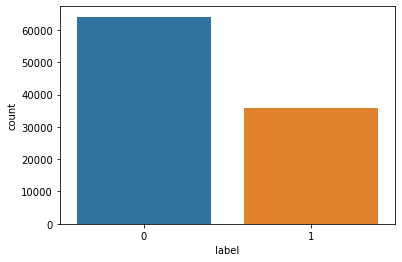

In [18]:
sns.countplot(df['label'],label="Count")
plt.show()

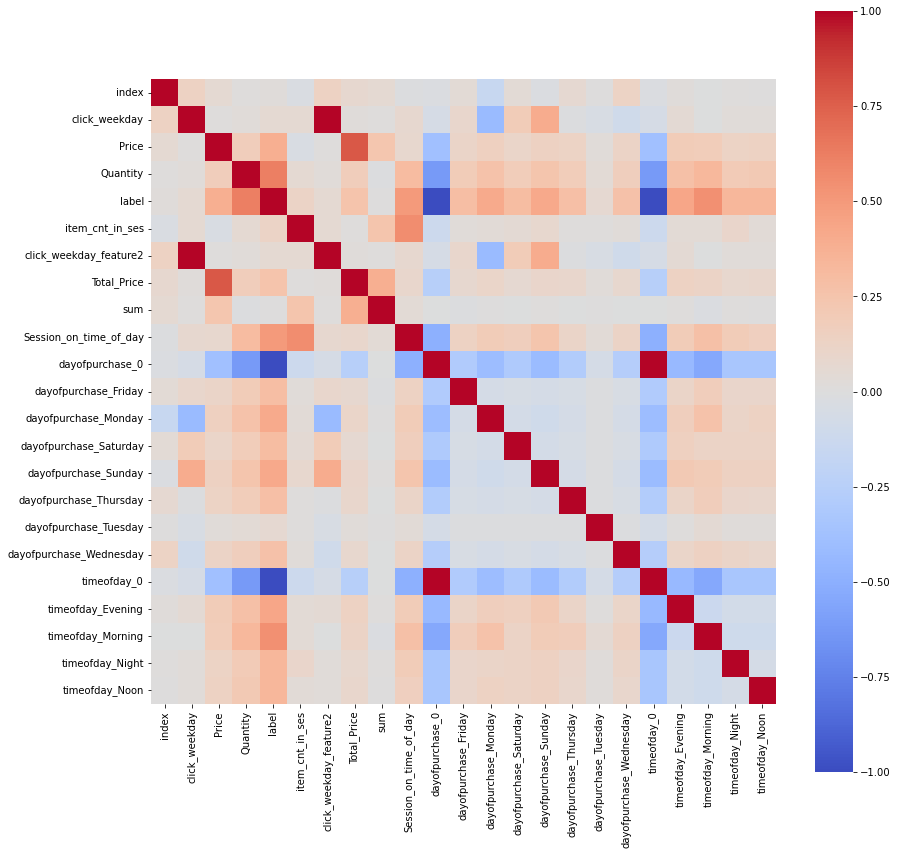

In [19]:
corr = df.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

## Question 4 - Modelling with logistics regression on the training set                        ---20 points

### As the outcome, you have to:
- predict 𝑦̂ for your model on test set
- calculate confusion matrix and derive measures such as precision, recall, f1-score, support

In [20]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [21]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
yhat=logistic.predict(X_test)
print(metrics.accuracy_score(yhat,y_test))

0.9999666666666667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
def get_scores(y_hat, y_test):
    tn, fp, fn, tp = confusion_matrix(yhat, y_test).ravel()
    
    precision = tp/ (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (precision * recall) / (precision + recall)
    
    return precision, recall,f1_score

precision, recall,f1_score = get_scores(yhat, y_test)
print (f"Precision using Logistic Regression= {precision}")
print (f"Recall using Logistic Regression= {recall}")
print(f"F-1 Score using Logistic Regression = {f1_score}")

Precision using Logistic Regression= 0.9999069680900549
Recall using Logistic Regression= 1.0
F-1 Score using Logistic Regression = 0.49997674094059635


## Question 5 - Build a decision tree on the training set ------ 25 points

### As the outcome, you have to:
- predict 𝑦̂ for your model on test set
- calculate confusion matrix and derive measures such as precision, recall, f1-score, support
- plot the decision tree, and explain the rules used by the tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train, sample_weight=None, check_input=True)
clf.get_params(deep=True)
y_pred = clf.predict(X_test, check_input=True)
clf.predict_log_proba(X_test)
clf.predict(X_test,check_input=True)
print(clf.score(X_test,y_test, sample_weight=None))

1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:978: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[19251     0]
 [    0 10749]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19251
           1       1.00      1.00      1.00     10749

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



[Text(167.4, 163.07999999999998, 'X[3] <= 0.5\ngini = 0.461\nsamples = 70000\nvalue = [44819, 25181]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 44819\nvalue = [44819, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 25181\nvalue = [0, 25181]')]

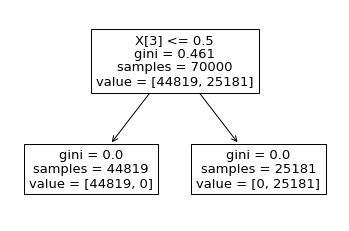

In [25]:
from sklearn import tree
tree.plot_tree(clf)

## Question 6 - Summary ------ 5 points
### Based on the models you have created, compare and contrast the two and give a brief summary on which one is more effective.
### Give your reasoning on selecting a preffered model.

I will use Decision tree as it gives me better model performance 